<a href="https://colab.research.google.com/github/gfidelisp/MagnetocaloricMaterials/blob/main/P4_2_Tc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning code for prediction of Temperature of Curie
This notebook presents a machine learning and data analysis study of the inlfluence of atomic properties on the temperature of curie for several perovskites.

In [2]:
# Este trecho de código permite o acesso aos arquivos do google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Copie os arquivos do drive do google para a pasta de trabalho deste google colab (content).
!cp /content/drive/Shareddrives/P4/utilities.py /content/
!cp /content/drive/Shareddrives/P4/PTable.csv /content/
!cp /content/drive/Shareddrives/P4/DB_mc.xlsx /content/
!cp /content/drive/Shareddrives/P4/AtomicProps.xlsx /content/

In [ ]:
# Módulos básicos de algebra linear, banco de dados e graficos
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Módulo com funções auxiliares
import utilities as u

# Módulos e clases de aprendizagem de maquina
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

include_tamanho = False
pca = False

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

In [ ]:
# Carregamento do dataset
dataset = pd.read_excel('DB_mc.xlsx', sheet_name='2')

# Filtrar por Temperatura de Curie, compociçao e valor
if include_tamanho:
  ds_tc = dataset[dataset['Property']=='Tc (K)'][['Compound','D_crystalite [nm]','Value']]
else:
  ds_tc = dataset[dataset['Property']=='Tc (K)'][['Compound','Value']]

# Apagar registros que tem parêntese e commas
ds_tc.drop(ds_tc[ds_tc['Compound'].str.contains('\(')].index, inplace=True)
print('Tamanho de dataframe depois de excluir as barras (\\) é: {} filas.'.format(ds_tc.shape))
ds_tc.drop(ds_tc[ds_tc['Compound'].str.contains(',')].index, inplace=True)
print('Tamanho de dataframe depois de excluir as commas (,) é: {} filas.'.format(ds_tc.shape))
ds_tc.drop(ds_tc[ds_tc['Compound'].str.contains('-')].index, inplace=True)
print('Tamanho de dataframe depois de excluir os lines (-) é: {} filas.'.format(ds_tc.shape))

# Excluir aqueles temperaturas de curie sem valoir de D_crystalite
if include_tamanho:
  ds_tc = ds_tc.dropna(subset=['D_crystalite [nm]'])

# Resetear index
ds_tc.reset_index(inplace=True)

# Criar dados de entrada para a rede neuronal
for i in range(ds_tc.shape[0]):
    xi = u.convert(ds_tc.iloc[i].Compound, mode='Whitout O')
    if include_tamanho:
      xi = np.concatenate((xi, np.array([ds_tc['D_crystalite [nm]'].iloc[i]]).reshape(-1, 1)), axis=1)
    yi = np.array([ds_tc.iloc[i].Value]).reshape(-1, 1)

    if i==0:
        X = xi
        Y = yi
    else:
        X = np.concatenate((X, xi), axis=0)
        Y = np.concatenate((Y, yi), axis=0)

V = np.concatenate((X, Y), axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:11: DeprecationWarning: invalid escape sequence '\('
<>:11: DeprecationWarning: invalid escape sequence '\('
<ipython-input-3-95eb29ae3ae2>:11: DeprecationWarning: invalid escape sequence '\('
  ds_tc.drop(ds_tc[ds_tc['Compound'].str.contains('\(')].index, inplace=True)


Tamanho de dataframe depois de excluir as barras (\) é: (408, 2) filas.
Tamanho de dataframe depois de excluir as commas (,) é: (407, 2) filas.
Tamanho de dataframe depois de excluir os lines (-) é: (407, 2) filas.


In [ ]:
# Visualização das dimensões dos vetores input (X) e ouput (Y)
print(X.shape)
print(Y.shape)

(407, 406)
(407, 1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Dependência Max Polarizability')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


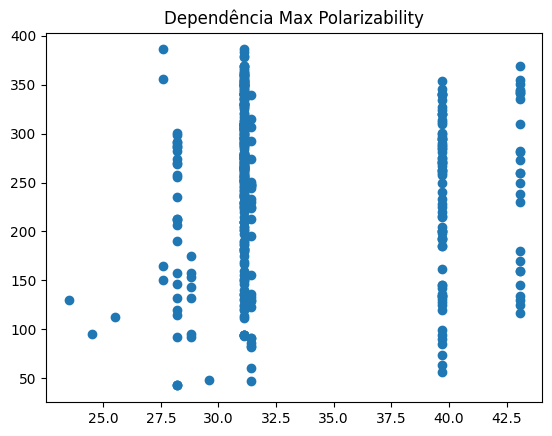

In [ ]:
# Algums plots para observar as dependências
num_input = 405
plt.scatter(X[:,num_input], Y)
rules = ['Sum', 'Mean', 'Var', 'Geo', 'Har', 'Min', 'Max']

col_names = []
for j in range(7):
  for i in range(58):
    col_name = rules[j]+' '+u.prop_names[i]
    col_names.append(col_name)

if include_tamanho:
  col_names = col_names + ['D']

plt.title('Dependência '+col_names[num_input])

O coeficiente de correlacao é -0.016343625759820596.


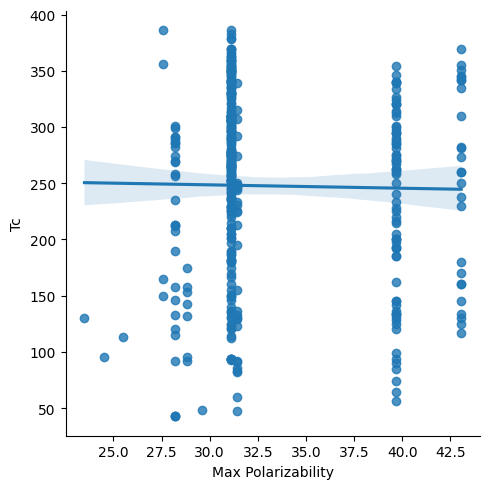

In [ ]:
# O mesmo tipo de gráfico, mas com o coeficiente de correlação.
num_input = 405
df_V = pd.DataFrame(V, columns=col_names+['Tc'], index=ds_tc['Compound'])
sns.lmplot(x=col_names[num_input], y='Tc', data=df_V)
corr = df_V[col_names[num_input]].corr(df_V['Tc'])
print('O coeficiente de correlacao é {}.'.format(corr))

In [ ]:
df = df_V
df.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

,Sum atomic_number,Sum atomic_radius,Sum atomic_radius_rahm,Sum atomic_volume,Sum atomic_weight,Sum boiling_point,Sum bulk_modulus,Sum c6_gb,Sum covalent_radius_cordero,Sum covalent_radius_pyykko,...,Max period,Max specific_heat,Max thermal_conductivity,Max vdw_radius,Max vdw_radius_alvarez,Max vdw_radius_mm3,Max vdw_radius_uff,Max sound_velocity,Max Polarizability,Tc
Sum atomic_number,1.000000,0.944584,0.954005,0.872113,0.999033,0.947702,0.862089,0.880616,0.953055,0.949030,...,-0.120618,-0.169439,-0.116066,-0.105933,-0.270696,-0.121503,0.148382,-0.000457,-0.127539,-0.052571
Sum atomic_radius,0.944584,1.000000,0.996956,0.969727,0.931807,0.946733,0.879793,0.930573,0.997372,0.999271,...,-0.180129,-0.078645,-0.024566,-0.108962,-0.305035,-0.071652,0.055523,0.029095,-0.159063,-0.032042
Sum atomic_radius_rahm,0.954005,0.996956,1.000000,0.949368,0.941908,0.956319,0.872858,0.921911,0.998716,0.997904,...,-0.144182,-0.083499,-0.018850,-0.130416,-0.304715,-0.106289,0.050747,0.022461,-0.169359,-0.048819
Sum atomic_volume,0.872113,0.969727,0.949368,1.000000,0.857209,0.879239,0.849727,0.942447,0.955965,0.964810,...,-0.268230,-0.090727,-0.047307,-0.004112,-0.242735,0.062551,0.042889,0.050256,-0.086293,0.005037
Sum atomic_weight,0.999033,0.931807,0.941908,0.857209,1.000000,0.938504,0.847587,0.871230,0.941389,0.936673,...,-0.108902,-0.178075,-0.130364,-0.099375,-0.251081,-0.120928,0.164736,-0.000709,-0.116710,-0.043015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Max vdw_radius_mm3,-0.121503,-0.071652,-0.106289,0.062551,-0.120928,-0.135553,-0.060621,0.145798,-0.076297,-0.075580,...,-0.030265,-0.150360,-0.271031,0.779721,0.342346,1.000000,-0.105399,-0.008675,0.577322,0.141370
Max vdw_radius_uff,0.148382,0.055523,0.050747,0.042889,0.164736,0.021846,0.053183,-0.044650,0.038025,0.045346,...,-0.048713,-0.055037,-0.107910,0.019375,0.050287,-0.105399,1.000000,0.044466,0.065386,0.185523
Max sound_velocity,-0.000457,0.029095,0.022461,0.050256,-0.000709,-0.014321,0.003657,0.019013,0.018642,0.029207,...,-0.387113,-0.014608,0.021036,-0.015280,-0.053174,-0.008675,0.044466,1.000000,-0.021534,0.155340
Max Polarizability,-0.127539,-0.159063,-0.169359,-0.086293,-0.116710,-0.157349,-0.260936,0.065288,-0.144671,-0.153811,...,0.124603,0.074711,-0.134071,0.944868,0.625595,0.577322,0.065386,-0.021534,1.000000,-0.016344


In [ ]:
# Análise de propriedades com coeficiente de correlação maior que 'x'
x = 0
corrs = df.corr().values[-1:]
props_rel = np.argwhere(np.abs(corrs)>x)[:-1,1]
print('Propriedades com o coeficiente de correlacao maior a {}: '.format(x))
print(len(props_rel))
for i in props_rel:
  print('Propriedade numero {0} : {1} corr={2:.2f}'.format(i, col_names[i], corrs[0,i]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Propriedades com o coeficiente de correlacao maior a 0: 
384
Propriedade numero 0 : Sum atomic_number corr=-0.05
Propriedade numero 1 : Sum atomic_radius corr=-0.03
Propriedade numero 2 : Sum atomic_radius_rahm corr=-0.05
Propriedade numero 3 : Sum atomic_volume corr=0.01
Propriedade numero 4 : Sum atomic_weight corr=-0.04
Propriedade numero 5 : Sum boiling_point corr=-0.06
Propriedade numero 6 : Sum bulk_modulus corr=-0.07
Propriedade numero 7 : Sum c6_gb corr=-0.01
Propriedade numero 8 : Sum covalent_radius_cordero corr=-0.04
Propriedade numero 9 : Sum covalent_radius_pyykko corr=-0.03
Propriedade numero 10 : Sum covalent_radius_pyykko_double corr=-0.04
Propriedade numero 11 : Sum covalent_radius_pyykko_triple corr=-0.03
Propriedade numero 12 : Sum covalent_radius_slater corr=-0.03
Propriedade numero 13 : Sum density corr=-0.10
Propriedade numero 14 : Sum dipole_polarizability corr=-0.03
Propriedade numero 15 : Sum electron_negativity corr=-0.08
Propriedade numero 16 : Sum electron_a

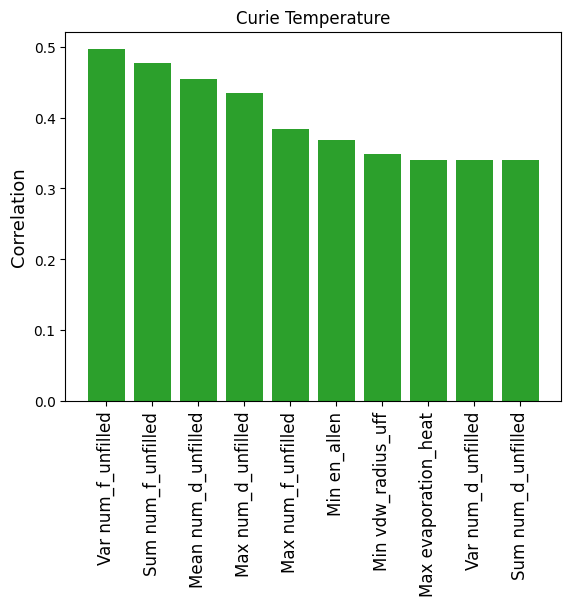

In [ ]:
import matplotlib.pyplot as plt

names = [col_names[i] for i in props_rel]
values = [abs(corrs[0,i]) for i in props_rel]

# Sort the values and names in descending order
sorted_indices = sorted(range(len(values)), key=lambda k: values[k], reverse=True)
sorted_names = [names[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

# Create a bar plot
plt.bar(sorted_names[1:11], sorted_values[1:11], color='tab:green')

# Add labels and title
plt.ylabel('Correlation', fontsize=13)
plt.title('Curie Temperature')

plt.xticks(rotation=90, fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Normalização do Input
#X_red = X[:, props_rel]
#escala = StandardScaler()
#escala.fit(X_red)
#X_norm = escala.transform(X_red)

escala = StandardScaler()
escala.fit(X)
X_norm = escala.transform(X)

In [ ]:
"""
PCA
"""

if pca:

  from sklearn.decomposition import PCA

  nc = 15

  # Perform PCA
  pca = PCA(n_components=nc)  # Specify the number of components you want to keep
  principal_components = pca.fit_transform(X_norm)

  # Access the principal components and the explained variance ratio
  components = pca.components_  # Principal components (eigenvectors)
  explained_variance_ratio = pca.explained_variance_ratio_  # Explained variance ratio

  # Print the explained variance ratio for each principal component
  for i, ratio in enumerate(explained_variance_ratio):
      print(f"Explained variance ratio of PC{i+1}: {ratio}")

  # You can access the transformed data (projected onto the principal components) as well
  print("Transformed data:")
  print(principal_components)

  """
  Split data
  """

  X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(principal_components, Y, test_size=0.2)

  rna = MLPRegressor(hidden_layer_sizes=(16,4), max_iter=20000, tol = 0.00001, learning_rate_init=0.01, solver="adam", activation='relu', learning_rate="adaptive", verbose=2, alpha=12)
  rna.fit(X_norm_train, Y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 34355.95968583
Iteration 2, loss = 34138.12585248
Iteration 3, loss = 34037.41982089
Iteration 4, loss = 33968.01721007
Iteration 5, loss = 33902.12637506
Iteration 6, loss = 33809.03405287
Iteration 7, loss = 33688.04119014
Iteration 8, loss = 33517.85150197
Iteration 9, loss = 33294.80193274
Iteration 10, loss = 33018.34250665
Iteration 11, loss = 32667.95864353
Iteration 12, loss = 32217.20298522
Iteration 13, loss = 31699.83917769
Iteration 14, loss = 31026.26694592
Iteration 15, loss = 30215.50335339
Iteration 16, loss = 29344.45664279
Iteration 17, loss = 28291.01132643
Iteration 18, loss = 27123.45656850
Iteration 19, loss = 25863.88364974
Iteration 20, loss = 24472.78080404
Iteration 21, loss = 23105.24652029
Iteration 22, loss = 21677.26064613
Iteration 23, loss = 20343.93998995
Iteration 24, loss = 19022.33059757
Iteration 25, loss = 18052.40689537
Iteration 26, loss = 16954.29750873
Iteration 27, loss = 16038.83281118
Iteration 28, loss = 14983.08437307
I

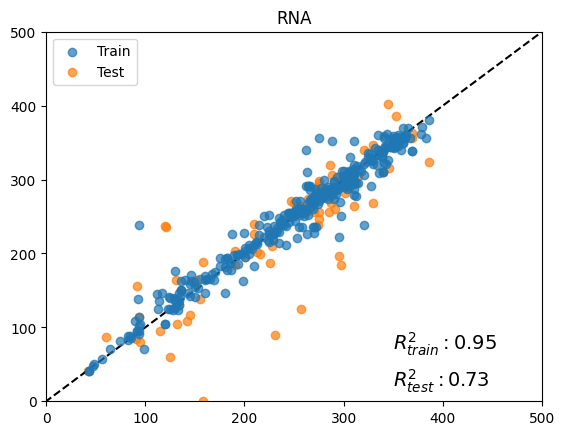

In [ ]:
"""
RNA
"""

# Divide em conjunto de treinamento e teste
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2)

# Processamento (treinamento da RNA)
rna = MLPRegressor(hidden_layer_sizes=(16,4), max_iter=20000, tol = 0.00001, learning_rate_init=0.01, solver="adam", activation='relu', learning_rate="adaptive", verbose=2, alpha=12)
rna.fit(X_norm_train, Y_train)

"""
Plot
"""

#Pós processamento

# Previsão do conjunto de traino e de teste
Y_rna_train = rna.predict(X_norm_train)
Y_rna_test = rna.predict(X_norm_test)

#cálculo do r2
r2_train = r2_score(Y_train, Y_rna_train)
r2_test = r2_score(Y_test, Y_rna_test)
print("R2 RNA train:", r2_train)
print("R2 RNA test:", r2_test)

plt.text(350, 70, s='$R^2_{train}:$'+str(round(r2_train, 2)), fontsize=14)
plt.text(350, 20, s='$R^2_{test}:$'+str(round(r2_test, 2)), fontsize=14)

plt.scatter(Y_train, Y_rna_train, alpha=0.7, label='Train', zorder=10)
plt.scatter(Y_test, Y_rna_test, alpha=0.7, label='Test')
plt.plot([-10, 800], [-10, 800], linestyle='--', color='k')
plt.xlim([0, 500])
plt.ylim([0, 500])
plt.title('RNA')
plt.legend()

## Grid Searching

In [ ]:
from sklearn.model_selection import GridSearchCV

rna = MLPRegressor(max_iter=20000, tol = 0.0001, learning_rate_init=0.01, solver="adam", learning_rate="adaptive", verbose=0,)

d_params = {'alpha' : [1, 2, 4, 8, 12, 16, 20],
            'hidden_layer_sizes' : [(8, 4), (16, 4), (16)],
            'activation' : ['relu', 'identity']
            }

reg = GridSearchCV(rna, d_params, cv=5)
reg.fit(X_norm_train, Y_train)

In [ ]:
print('The best parameters are: ')
print(reg.best_params_)
print('with a score (R2) of:')
print('{:.3f}'.format(reg.best_score_))

## Utilizando Tensorflow

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

Epoch 1/100
11/11 [==============================] - 6s 19ms/step - loss: 68770.4062 - val_loss: 67234.2812
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 68329.2578 - val_loss: 67081.0391
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 68187.2344 - val_loss: 67007.0938
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 68086.9453 - val_loss: 66925.0391
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 67954.5938 - val_loss: 66805.8828
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 67764.8828 - val_loss: 66642.3516
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 67479.9297 - val_loss: 66410.3281
Epoch 8/100
11/11 [==============================] - 0s 13ms/step - loss: 67072.9062 - val_loss: 66066.9375
Epoch 9/100
11/11 [==============================] - 0s 13ms/step - loss: 66503.4297 - val_loss: 65572.5000
Epoch 10/100
11/11 [=============

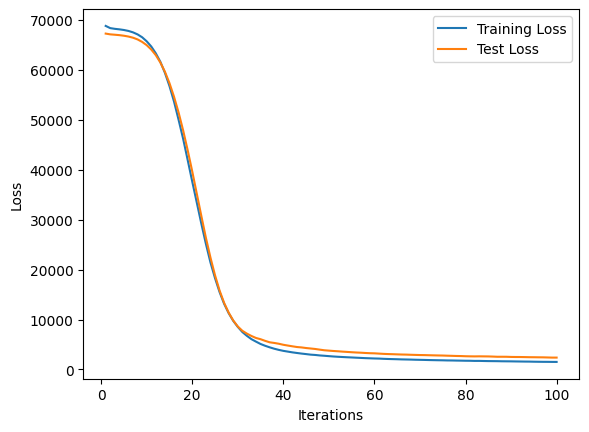

In [ ]:
"""
Train model 2
"""

import tensorflow as tf

# Define the ANN architecture
ann2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
ann2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and track the loss history
history = ann2.fit(X_norm_train, Y_train, epochs=100, batch_size=32, validation_data=(X_norm_test, Y_test))

# Obtain the loss values for the training and test sets
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot the loss as a function of iterations
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


11/11 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3/3 [==============================] - 0s 5ms/step
R2 RNA train: 0.7747608092539013
R2 RNA test: 0.6610461536848147


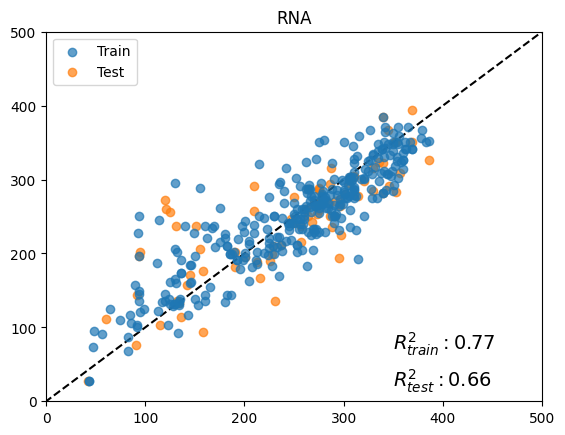

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
"""
Plot
"""

#Pós processamento

# Previsão do conjunto de traino e de teste
Y_rna_train = ann2.predict(X_norm_train)
Y_rna_test = ann2.predict(X_norm_test)

#cálculo do r2
r2_train = r2_score(Y_train, Y_rna_train)
r2_test = r2_score(Y_test, Y_rna_test)
print("R2 RNA train:", r2_train)
print("R2 RNA test:", r2_test)

plt.text(350, 70, s='$R^2_{train}:$'+str(round(r2_train, 2)), fontsize=14)
plt.text(350, 20, s='$R^2_{test}:$'+str(round(r2_test, 2)), fontsize=14)

plt.scatter(Y_train, Y_rna_train, alpha=0.7, label='Train', zorder=10)
plt.scatter(Y_test, Y_rna_test, alpha=0.7, label='Test')
plt.plot([-10, 800], [-10, 800], linestyle='--', color='k')
plt.xlim([0, 500])
plt.ylim([0, 500])
plt.title('RNA')
plt.legend()

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.3 MB/s eta 0:00:00


## Otimização dos Hiperparamtros com Hyperband

In [ ]:
from tensorflow.keras.layers import Input, BatchNormalization, Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
X_v_train, X_v_val, y_v_train, y_v_val = train_test_split(X_norm_train, Y_train, test_size=0.2, random_state = 42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def Build(hp):

    initializer = tf.keras.initializers.GlorotNormal(seed = 42)

    #Grouping a stack of Layers in Model
    model = tf.keras.Sequential()

    # Adding the Layers
    # The number of layers, neurons in each one and activation functions are going to be tunned
    for i in range(hp.Int('layers', 1, 4)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i), 0, 51, step=2),
                                        activation=hp.Choice('act_' + str(i), ['relu','sigmoid','selu','softmax', 'tanh']),
                                        kernel_initializer = initializer
                                        ))
        #model.add(Dropout(0.2))
        #Applying a Batch Normalization Layer after Dense Layer
        # model.add(BatchNormalization())


    # Adding a final Layer
    model.add(tf.keras.layers.Dense(1, activation=hp.Choice('act_output', ['relu','selu'])))

    # Compiling the Model with the Adam optimization algorithm
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values = [1e-0, 1e-1, 1e-2, 1e-3, 1e-4]),
                                 hp.Choice('decay', values = [ 1e-1, 1e-2, 1e-3, 1e-4])
                                 ),
                            loss="mean_squared_error"
                            )
    return model

In [ ]:
class MyTuner(kt.Hyperband):
    def run_trial(self, trial, *args, **kwargs):
        return super(MyTuner, self).run_trial(trial, *args, **kwargs)

In [ ]:
tuner = MyTuner(Build,
                objective = 'val_loss',
                max_epochs = 300,
                directory='KT_Dir',
                project_name='KT_Hyp_'
)

In [ ]:
tuner.search(X_v_train,
             y_v_train,
             epochs=300,
             batch_size = 1,
             callbacks=[EarlyStopping('val_loss', patience=10)],
             verbose=1,
             validation_data=(X_v_val, y_v_val))

Trial 725 Complete [00h 00m 22s]
val_loss: 69385.6171875

Best val_loss So Far: 1721.40478515625
Total elapsed time: 02h 13m 58s


In [ ]:
best_model = tuner.get_best_models()[0]

NameError: ignored

In [ ]:
print('\n The hyperparameters of the model are' + str(tuner.get_best_hyperparameters()[0].values) + '\n')

3/3 [==============================] - 0s 3ms/step
R2 RNA train: 0.8509874719600394
R2 RNA test: 0.6334501605190226


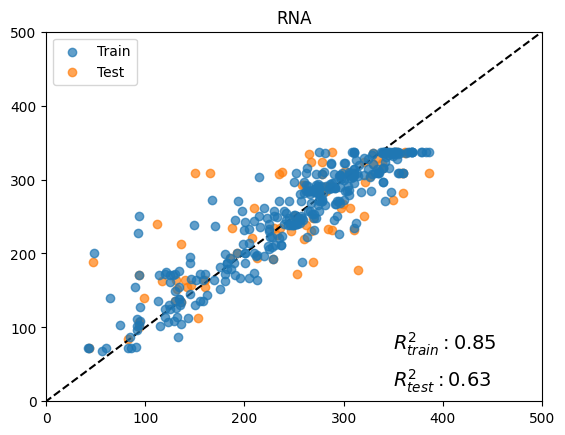

In [ ]:
"""
Plot
"""

#Pós processamento

# Previsão do conjunto de traino e de teste
Y_rna_train = best_model.predict(X_v_train)
Y_rna_val = best_model.predict(X_v_val)
Y_rna_test = best_model.predict(X_norm_test)

#cálculo do r2
r2_train = r2_score(Y_train, Y_rna_train)
r2_val = r2_score(y_v_val, Y_rna_val)
r2_test = r2_score(Y_test, Y_rna_test)

print("R2 RNA train:", r2_train)
print("R2 RNA validation:", r2_val)
print("R2 RNA test:", r2_test)

plt.text(350, 120, s='$R^2_{train}:$'+str(round(r2_train, 2)), fontsize=14)
plt.text(350, 70, s='$R^2_{val}:$'+str(round(r2_val, 2)), fontsize=14)
plt.text(350, 20, s='$R^2_{test}:$'+str(round(r2_test, 2)), fontsize=14)

plt.scatter(y_v_train, Y_rna_train, alpha=0.7, label='Train', zorder=10)
plt.scatter(y_v_val, Y_rna_val, alpha=0.7, label='Train', zorder=10)
plt.scatter(Y_test, Y_rna_test, alpha=0.7, label='Test')
plt.plot([-10, 800], [-10, 800], linestyle='--', color='k')
plt.xlim([0, 500])
plt.ylim([0, 500])
plt.title('RNA')
plt.legend()